## ML project 2

Notes
train model for each expert
0.5 'missing gender' somehing else than male/ female
- model ohne metadata wie age gender etc, just the coughs

person coughs --> want to tell wether wet or dry
dont use other expert information

In [79]:
import pandas as pd
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, auc, roc_curve



from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold

Features:

Columns C-BQ: Computed features in the time and frequency domain

Column BR: The expert that reviwed the cough

Columns BS-BV: Metadata features provided by users

--Some values were not provided by users and were set to average values for each feature

The 'SNR' feature exists for non-segmented coughs but not segmented coughs

## Load Data

In [146]:
# Load data
coarse_data = pd.read_csv('./cough_data/train_data/features_coarse_segmentation.csv').drop(['Unnamed: 0'], axis=1)
fine_data = pd.read_csv('./cough_data/train_data/features_fine_segmentation.csv').drop(['Unnamed: 0'], axis=1)
no_data = pd.read_csv('./cough_data/train_data/features_no_segmentation.csv').drop(['Unnamed: 0'], axis=1)

#display(coarse_data.head(2), fine_data.head(2), no_data.head(2))

In [126]:
# Load labels
# Labels:
# 1 - Wet Cough
# 0 - Dry Cough
coarse_labels = pd.read_csv('./cough_data/train_data/labels_coarse_segmentation.csv').drop(['Unnamed: 0'], axis=1)
fine_labels = pd.read_csv('./cough_data/train_data/labels_fine_segmentation.csv').drop(['Unnamed: 0'], axis=1)
no_labels = pd.read_csv('./cough_data/train_data/labels_no_segmentation.csv').drop(['Unnamed: 0'], axis=1)

#display(coarse_labels.head(2), fine_labels.head(2), no_labels.head(2))

1. Data Preprocessing

3.Deal with missing metadata appropriately

2.Perform exploratory data analysis and feature engineering (ex. examine theeffects of normalizing features, recursive feature elimination)

4
2.Make sure that data from a single subject does not end up in both thetraining and validation groups


### Normalisation

In [150]:
from sklearn.preprocessing import scale
coarse_data.iloc[:, 1:] = scale(coarse_data.iloc[:,1:])
fine_data.iloc[:, 1:] = scale(fine_data.iloc[:,1:])
no_data.iloc[:, 1:] = scale(no_data.iloc[:,1:])



### Find interesting features

In [156]:
no_data.columns

Index(['File_Name', 'EEPD50_100', 'EEPD100_150', 'EEPD150_200', 'EEPD200_250',
       'EEPD250_300', 'EEPD300_350', 'EEPD350_400', 'EEPD400_450',
       'EEPD450_500', 'EEPD500_550', 'EEPD550_600', 'EEPD600_650',
       'EEPD650_700', 'EEPD700_750', 'EEPD750_800', 'EEPD800_850',
       'EEPD850_900', 'EEPD900_950', 'EEPD950_1000', 'Zero_Crossing_Rate',
       'RMS_Power', 'Dominant_Freq', 'Spectral_Centroid', 'Spectral_Rolloff',
       'Spectral_Spread', 'Spectral_Skewness', 'Spectral_Kurtosis',
       'Spectral_Bandwidth', 'Spectral_Flatness', 'Spectral_StDev',
       'Spectral_Slope', 'Spectral_Decrease', 'MFCC_mean0', 'MFCC_mean1',
       'MFCC_mean2', 'MFCC_mean3', 'MFCC_mean4', 'MFCC_mean5', 'MFCC_mean6',
       'MFCC_mean7', 'MFCC_mean8', 'MFCC_mean9', 'MFCC_mean10', 'MFCC_mean11',
       'MFCC_mean12', 'MFCC_std0', 'MFCC_std1', 'MFCC_std2', 'MFCC_std3',
       'MFCC_std4', 'MFCC_std5', 'MFCC_std6', 'MFCC_std7', 'MFCC_std8',
       'MFCC_std9', 'MFCC_std10', 'MFCC_std11', 'MFCC_s

In [171]:
#no_data_X_tr.iloc[:,0:-5]
# possibly nice features:
# 
# 
        
c0 = ['EEPD50_100', 'EEPD100_150', 'EEPD150_200', 'EEPD200_250', 'EEPD250_300', 'EEPD300_350', 'EEPD350_400', 'EEPD400_450',
       'EEPD450_500', 'EEPD500_550', 'EEPD550_600', 'EEPD600_650','EEPD650_700', 'EEPD700_750', 'EEPD750_800', 'EEPD800_850',
       'EEPD850_900', 'EEPD900_950', 'EEPD950_1000', 'Cough_Length']


c1 = ['Zero_Crossing_Rate',
       'RMS_Power', 'Dominant_Freq', 'Spectral_Centroid', 'Spectral_Rolloff',
       'Spectral_Spread', 'Spectral_Skewness', 'Spectral_Kurtosis',
       'Spectral_Bandwidth', 'Spectral_Flatness', 'Spectral_StDev',
       'Spectral_Slope', 'Spectral_Decrease']

c2 = ['MFCC_mean0', 'MFCC_mean1',
       'MFCC_mean2', 'MFCC_mean3', 'MFCC_mean4', 'MFCC_mean5', 'MFCC_mean6',
       'MFCC_mean7', 'MFCC_mean8', 'MFCC_mean9', 'MFCC_mean10', 'MFCC_mean11',
       'MFCC_mean12', 'MFCC_std0', 'MFCC_std1', 'MFCC_std2', 'MFCC_std3',
       'MFCC_std4', 'MFCC_std5', 'MFCC_std6', 'MFCC_std7', 'MFCC_std8',
       'MFCC_std9', 'MFCC_std10', 'MFCC_std11', 'MFCC_std12']

c3 = ['Crest_Factor',
       'Cough_Length', 'SNR']


c4 = ['Zero_Crossing_Rate',
       'RMS_Power', 'Dominant_Freq', 'Spectral_Centroid', 'Spectral_Rolloff',
       'Spectral_Spread', 'Spectral_Skewness', 'Spectral_Kurtosis',
       'Spectral_Bandwidth', 'Spectral_Flatness', 'Spectral_StDev',
       'Spectral_Slope', 'Spectral_Decrease', 'Crest_Factor',
       'Cough_Length', 'SNR', 'PSD_225-425', 'PSD_450-550', 'PSD_1325-1600',
       'PSD_1600-2000', 'PSD_2500-2900', 'PSD_3100-3700' ]

c5 = ['PSD_225-425', 'PSD_450-550', 'PSD_1325-1600',
       'PSD_1600-2000', 'PSD_2500-2900', 'PSD_3100-3700']

c6 = c3 + c5 # best one for Linear Regression

c7 = ['Expert', 'Age',
       'Gender', 'Resp_Condition', 'Symptoms'] # metadata


# best columns
c = ['Crest_Factor', 'Cough_Length', 'SNR', 'Expert', 'Age', 'Gender', 'Resp_Condition', 'Symptoms']
cc = ['Crest_Factor', 'Cough_Length', 'Expert', 'Age', 'Gender', 'Resp_Condition', 'Symptoms']

## Train and Test data

In [91]:
#a, b, c, d = train_test_split(coarse_data, coarse_labels, random_state = 1, test_size = 0.2)

def train_test(X, y, fraction = 0.8, random_state = 1, segmentation = True):
    
    # If there are several instances of the same subject, we don't want it to be in the training and testing set
    if segmentation == True:
        X[['Subject', 'Cough']] = X['File_Name'].str.split("_", expand = True)
        y[['Subject', 'Cough']] = y['File_Name'].str.split("_", expand = True)
    
        # index for Subject
        X = X.set_index(['Subject'])
        y = y.set_index(['Subject'])
    
    train_X = X.loc[X.sample(frac = fraction, random_state=random_state).index.unique()]
    test_X = X.drop(train_X.index)
    
    train_y = y.loc[y.sample(frac = fraction, random_state=random_state).index.unique()]
    test_y = y.drop(train_y.index)
    
    return train_X, test_X, train_y, test_y


In [172]:
random_state = 1

# Choose some features
no_data = no_data[c]
coarse_data = coarse_data[cc]
fine_data = fine_data[cc]


# Split no segmentation data
no_data_X_tr, no_data_X_te, no_labels_y_tr, no_labels_y_te = train_test(no_data, no_labels, segmentation = False)

# Divide coarse and fine data
coarse_data_X_tr, coarse_data_X_te, coarse_labels_y_tr, coarse_labels_y_te = train_test(coarse_data, coarse_labels, random_state = random_state)

fine_data_X_tr, fine_data_X_te, fine_labels_y_tr, fine_labels_y_te = train_test(fine_data, fine_labels, random_state = random_state)


KeyError: 'File_Name'

## Methoden

2. Methods aufsetzen

- ICH

1.Perform wet vs dry cough classification using state-of-the-art ML classificationalgorithms (Logistic Regression, Support Vector Machines, Linear DiscriminantAnalysis, k Nearest Neighbors, Gaussian Naive Bayes, Decision Tree, RandomForest, and eXtreme Gradient Boosting) using the computed features andsubject metadata.


6.Report meaningful scores accounting for potential label imbalance (i.e.report AUC instead of classification accuracy)

### Define a function that automatically plots the AUC curve for a given classifier

In [56]:
def roc_w_cross_val(X, y, classifier):
    
    cv = StratifiedKFold(n_splits=6)
    
    X = X.to_numpy()
    y = y['Label'].to_numpy()


    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
   # ax.legend(loc="lower right")
    ax.legend(bbox_to_anchor=(1,0), loc="lower left")
    plt.show()
    

### Logistic regression

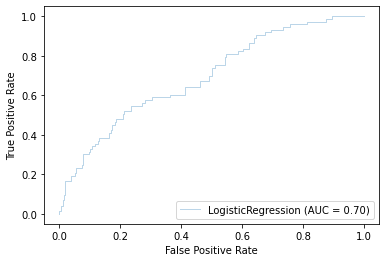

In [160]:
logistic = LogisticRegression()
logistic.fit(no_data_X_tr[c6+c7],no_labels_y_tr['Label'])

fig, ax = plt.subplots()
plot_roc_curve(logistic, no_data_X_te[c6+c7], no_labels_y_te['Label'],
                         alpha=0.3, lw=1, ax=ax)
plt.show()

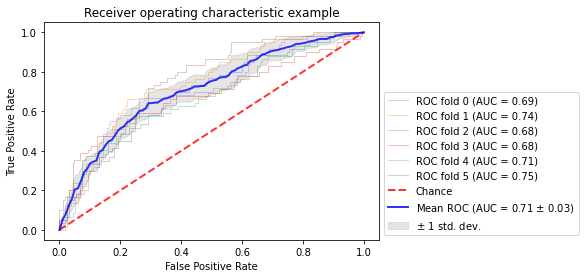

In [161]:
#roc_w_cross_val(no_data_X_tr.iloc[:,1:-5], no_labels_y_tr, LogisticRegression())

roc_w_cross_val(no_data_X_tr[c6+c7], no_labels_y_tr, LogisticRegression()) #AUC 62

#roc_w_cross_val(no_data_X_tr[c5], no_labels_y_tr, LogisticRegression())


### SVM

In [156]:
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(no_data_X_tr[c6 + c7], no_labels_y_tr['Label'])

#Predict the response for test dataset
y_pred = clf.predict(no_data_X_te[c6 + c7])

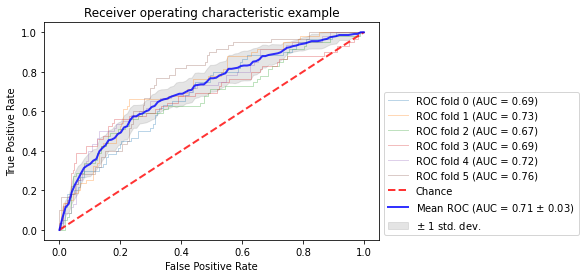

In [158]:
roc_w_cross_val(no_data_X_tr[c6+c7], no_labels_y_tr, SVC(kernel='linear'))

### Linear Discriminant Analysis

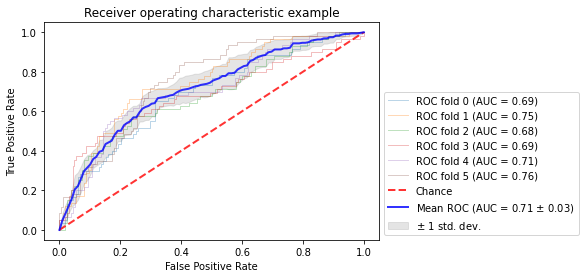

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
clf.fit(no_data_X_tr[c6 + c7], no_labels_y_tr['Label'])
LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)


roc_w_cross_val(no_data_X_tr[c6+c7], no_labels_y_tr, LDA())

### k Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
roc_w_cross_val(no_data_X_tr[c6+c7], no_labels_y_tr, LDA())

### Gaussian Naive Bayes

### Decision Tree

### RandomForest

### eXtreme Gradient Boosting

3. Cross validation

1.Compare the success of different classifiers, very carefully performing afair model comparison (i.e. relying on validation scores using leave-n-subjects-out cross-validation).


4. Model Comparison


4.Compare classification success on segmented and non-segmented coughrecordings (all pre-processing will be done by the lab)
5.Tune the model hyperparameters appropriately

3.Assess the importance of different features to the classification result by analyzing the weights of the classifier or SHAP values.

5. Deep learning -> autoencoder
4.(Bonus) Try using Deep Learning methods to perform cough classificationdirectly on the raw audio signals

5. Explainability